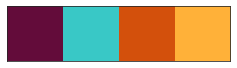

In [125]:
from typing import NamedTuple
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [126]:
songs = pd.read_csv(".\dataset\mySongsDataset.csv")

songs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2889 non-null   object 
 1   artist        2889 non-null   object 
 2   id            2889 non-null   object 
 3   danceability  2889 non-null   float64
 4   energy        2889 non-null   float64
 5   loudness      2889 non-null   float64
 6   speechiness   2889 non-null   float64
 7   acousticness  2889 non-null   float64
 8   tempo         2889 non-null   float64
 9   liveness      2889 non-null   float64
 10  valence       2889 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.4+ KB


In [127]:
songs.head()

,name,artist,id,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.603,-4.892,0.2260,0.02720,123.061,0.1670,0.497
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.390,-11.033,0.0524,0.83700,87.512,0.1010,0.530
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.692,-6.643,0.0262,0.47800,104.095,0.0446,0.965
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.849,-5.216,0.0833,0.00014,94.964,0.4230,0.503
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.916,-4.698,0.0644,0.00285,186.941,0.2630,0.338


In [128]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

In [129]:
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.913635,0.2260,0.02720,0.1670
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.750193,0.0524,0.83700,0.1010
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.867032,0.0262,0.47800,0.0446
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.905012,0.0833,0.00014,0.4230
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.918798,0.0644,0.00285,0.2630


c:\python38\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>, <AxesSubplot:>]],
      dtype=object)

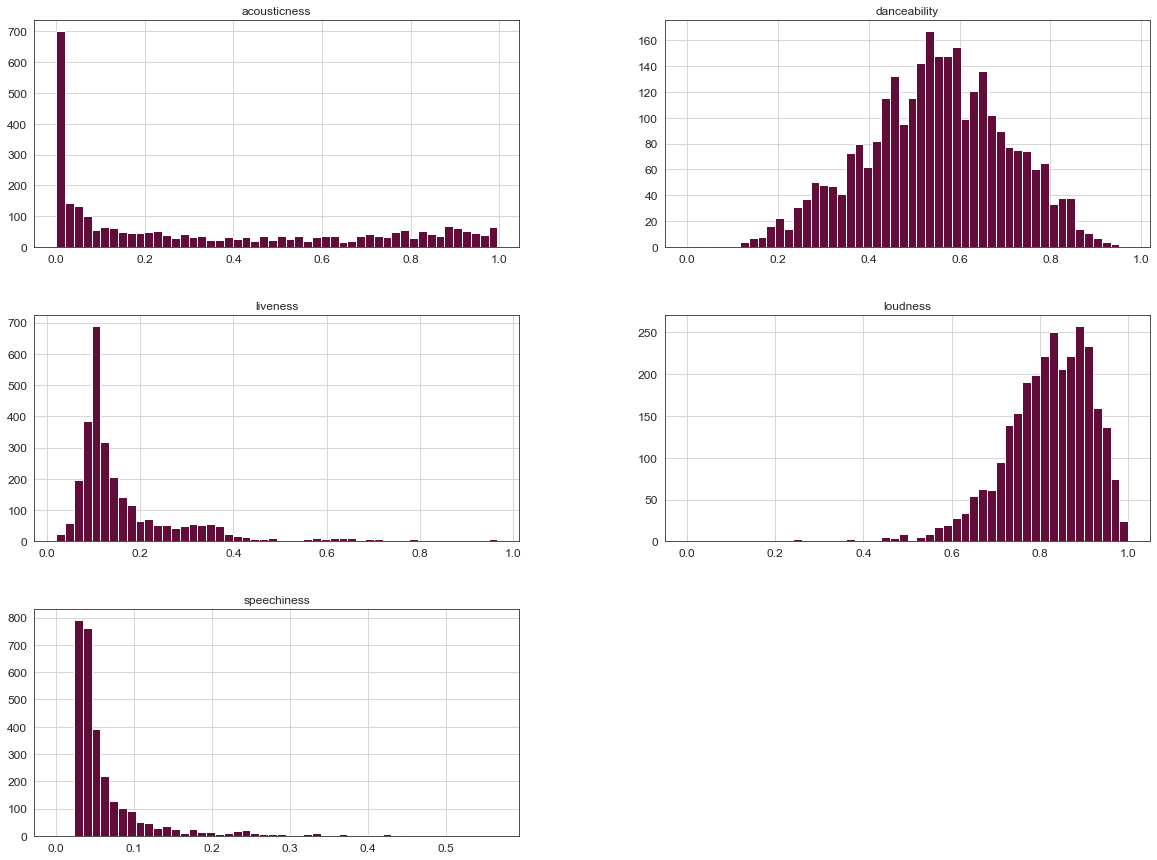

In [130]:
songs.hist(bins=50,figsize=(20,15))

In [131]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [132]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [133]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5076157656291582)
For n_clusters = 3, silhouette score is 0.3441081562916239)
For n_clusters = 4, silhouette score is 0.35267984803340047)
For n_clusters = 5, silhouette score is 0.2759415253416615)
For n_clusters = 6, silhouette score is 0.26109266344645127)
For n_clusters = 7, silhouette score is 0.2601691266659827)
For n_clusters = 8, silhouette score is 0.253001076521738)
For n_clusters = 9, silhouette score is 0.23424505309108268)
For n_clusters = 10, silhouette score is 0.2406768324902516)
For n_clusters = 11, silhouette score is 0.24022857697295238)
For n_clusters = 12, silhouette score is 0.23960967407141495)
For n_clusters = 13, silhouette score is 0.22777008942640323)
For n_clusters = 14, silhouette score is 0.2278748864395339)


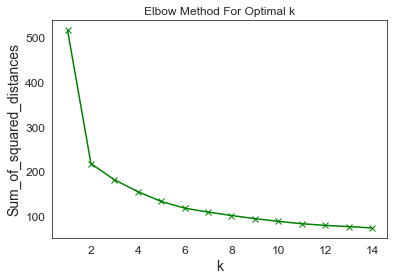

In [134]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [135]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [136]:
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

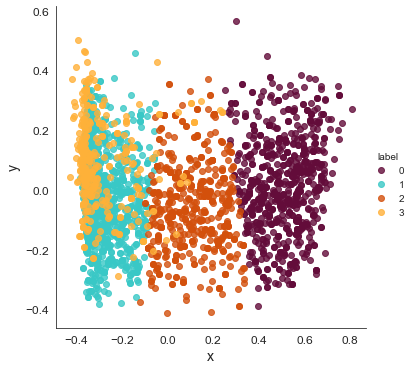

In [137]:

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [138]:
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

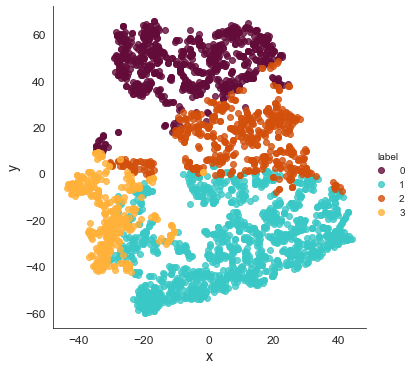

In [139]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [140]:
pca.explained_variance_ratio_

array([0.69392072, 0.1385622 ])

In [141]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.042347 -0.198992    -0.023744       0.97634 -0.069326
PC-2     -0.968245 -0.011416    -0.054485      -0.02846  0.242060


In [142]:
songs['label'] = y_kmeans

In [143]:
songs = songs.sample(frac=1)
songs['label'].value_counts()

1    1217
0     767
2     543
3     362
Name: label, dtype: int64

In [144]:
songs[songs['label'] == 0].tail(50) #Happy

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1278,Do Seu Lado,Chico Bernardes,3Qqn9nIzoqnswgO4GJtWku,0.463,0.795491,0.0285,0.910,0.1090,0
950,Videotape,Radiohead,3uxhyRdWVXp7GQvERQl6fA,0.581,0.745881,0.0336,0.697,0.0889,0
393,Small Worlds,Mac Miller,4gT3mNJA8lnlkYFqGZ8IA2,0.516,0.801506,0.2490,0.814,0.0995,0
464,The Sun Is In Your Eyes - Voice Memo,Jacob Collier,6BzQnbYMiASXdwTerVH3zy,0.531,0.730152,0.0393,0.864,0.1260,0
1357,Good Dancers,Emmy Curl,2sNeOmgHQYwDjUAe2Og3GR,0.537,0.574934,0.0385,0.741,0.2070,0
1502,A Pele Que Há Em Mim [Quando o dia Entardeceu]...,Márcia,5f9hHZTRYQDngnrt3o2IOC,0.637,0.684321,0.0374,0.924,0.1110,0
2060,Maya,Ian Clarke,20MCOMaJmMlN6VcRRe4TLi,0.307,0.477763,0.0404,0.992,0.1130,0
1683,Featherstone,The Paper Kites,45p0MAVey0dnjZXo8kMUzh,0.803,0.679424,0.0367,0.868,0.1040,0
536,iMi,Bon Iver,5p2vqFW6PVyE38GJlCVIHv,0.489,0.735901,0.0530,0.889,0.2030,0
1899,Eu,Mariana Froes,5SChoGCJUCjTdIi8JM28zf,0.840,0.732015,0.0371,0.894,0.1050,0


In [145]:
songs[songs['label'] == 1].head(50) #Energetic

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1681,Paper Castles,Alice Phoebe Lou,1H3fbQu5igJJgH6HBQ2Qrq,0.571,0.801719,0.0414,0.214000,0.1190,1
444,Scared of the Dark (feat. XXXTENTACION),Lil Wayne,3vWzyGTu6Ovo1GdrcJqH6e,0.443,0.865063,0.0718,0.046800,0.2470,1
1152,Oh Sheit it's X,Thundercat,6EidGY4S6hkU6fwNdSSabg,0.632,0.829532,0.0459,0.000323,0.1420,1
1468,Lovers in the Parking Lot,Solange,3RWZvjUcIo8urOq6eOAuRX,0.709,0.865196,0.0434,0.080800,0.1200,1
2197,Dust,The Neighbourhood,7inCfDM4S3xsVzgOUqSJOH,0.348,0.839539,0.0637,0.097100,0.1120,1
2649,A Beautiful Indifference,Rise Against,613d5vzWkgFynGkBYhjG9a,0.271,0.957656,0.0775,0.000060,0.1320,1
2138,Um Pé na incerteza,Emmy Curl,0DFzo6qZAIms5okwYzoGlY,0.616,0.579113,0.0544,0.020800,0.1120,1
2628,Re-Education (Through Labor),Rise Against,6c1Bdvp208X0jbLmFnWbkC,0.243,0.953664,0.1020,0.000417,0.1330,1
124,Handmade Cities,Plini,257CrtLcfv4n9bBuDU4vgQ,0.588,0.861736,0.0434,0.049700,0.1630,1
475,Nangs,Tame Impala,1cCbsojaA6GIT7Y3zuMJ1q,0.536,0.784233,0.1810,0.159000,0.1280,1


In [146]:
songs[songs['label'] == 2].tail(50) #Calm

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
894,Earth Intruders,Björk,7GgzqbrToXcicwk4yBS1BN,0.626,0.835227,0.2700,0.395,0.3850,2
384,Someone New,Hozier,22sS7JkzeVeq4vOPCB6Fbj,0.593,0.885583,0.0349,0.407,0.2860,2
602,Some Lazy Days,Cícero,6IzIxuegLDSdebVCsHIciW,0.686,0.803742,0.0255,0.504,0.1160,2
442,drugs,EDEN,3OXpdrHLT4IqM76RajgM6Q,0.484,0.859261,0.0636,0.601,0.2380,2
1762,Sound of Rain,Solange,4o8Rk1YzdkTxsSEXd3YhAK,0.800,0.873420,0.0326,0.326,0.1530,2
2318,Let Go,Beau Young Prince,5F2AuFzEiuAQD0JVNjVJQz,0.764,0.809305,0.0576,0.463,0.1090,2
1722,Marseilles,Elijah Fox,1jJFvvCP0HMMx7XVtbDhNu,0.463,0.819285,0.0412,0.331,0.1200,2
2141,Pisces,Emmy Curl,49w0lj1UWZUwmXwQKtXksm,0.667,0.807335,0.0304,0.399,0.1050,2
15,Arevil's Gardens (Rip),The Land of Rah,6s7RPRB3sNO4bpaIYntHZ2,0.765,0.797700,0.0357,0.513,0.1410,2
267,Unison,Björk,1t9us2hggVqmnyWz7uG54y,0.536,0.750566,0.0484,0.385,0.1650,2


In [147]:
songs[songs['label'] == 3].tail(50) #Sad

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1591,Freaking Out the Neighborhood,Mac DeMarco,25SJaCCPiosugnlY53VhRG,0.565,0.890773,0.1080,0.063900,0.386,3
2541,Complicated,Avril Lavigne,5xEM5hIgJ1jjgcEBfpkt2F,0.585,0.886860,0.0459,0.057200,0.300,3
2206,Pretty Boy,The Neighbourhood,6Q5mJdY0XcBLNVq9NLZuto,0.578,0.738722,0.0278,0.208000,0.307,3
499,EARFQUAKE,"Tyler, The Creator",5hVghJ4KaYES3BFUATCYn0,0.554,0.807867,0.0685,0.230000,0.795,3
1569,Juice,Lizzo,0k664IuFwVP557Gnx7RhIl,0.767,0.964309,0.0963,0.006110,0.402,3
2777,Broken Glass,Three Days Grace,6rpAJECCjVZG3cNt7o9xBv,0.515,0.886674,0.0645,0.054300,0.363,3
2579,Gangsta's Paradise,Coolio,7lQWRAjyhTpCWFC0jmclT4,0.647,0.776355,0.0593,0.065500,0.398,3
2377,Pac-Man (feat. ScHoolboy Q),Gorillaz,4hURm1oP1rE1KZ4zd7mRay,0.762,0.898677,0.0961,0.273000,0.333,3
2511,The Hangman's Body Count,Volbeat,101BaITut2SroBfpBZuFBx,0.555,0.902856,0.0272,0.000058,0.318,3
2305,West Coast,The Neighbourhood,4TaY35s44Bf6OQnRK4R8Y5,0.742,0.874671,0.1080,0.162000,0.337,3


In [148]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)
cross_val_score(rfc,X,y,cv=5)

array([0.97404844, 0.98096886, 0.98442907, 0.97923875, 0.98786828])

In [149]:
y_pred = rfc.predict(X_test)

In [150]:
X_train

,danceability,loudness,speechiness,acousticness,liveness
1084,0.488,0.907833,0.0336,0.000597,0.1010
2686,0.632,0.833923,0.0348,0.313000,0.0712
1415,0.381,0.897320,0.0368,0.160000,0.0842
1220,0.787,0.713784,0.0383,0.895000,0.1150
1317,0.308,0.912730,0.0418,0.436000,0.1130
...,...,...,...,...,...
1831,0.632,0.682059,0.0337,0.905000,0.1460
754,0.477,0.782956,0.0484,0.005480,0.3400
205,0.541,0.879594,0.0374,0.232000,0.1990
264,0.585,0.841908,0.0592,0.074500,0.0915


In [151]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[271   0   3   0]
 [  0 405   0   2]
 [  2   0 155   0]
 [  0   2   2 112]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

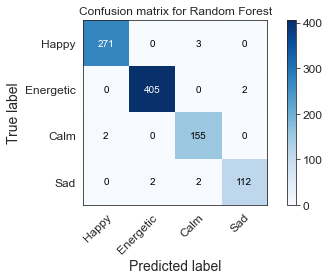

In [152]:
#definitions=['Energetic','Depressed','Sad','Calm','Happy','Contentment','Frantic','Exuberant']
definitions=["Happy",'Energetic','Calm','Sad']
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [153]:
import pickle

with open('MOODAI.pickle','wb') as fe_data_file:
     pickle.dump(rfc, fe_data_file)

In [154]:
#Code Example
#Import the module
#import pickle
#Load the data - No need to do Feature Engineering again
#with open('fe_data.pickle','rb') as fe_data_file:
#     feature_engineered_data = pickle.load(fe_data_file)
#Continue with your modeling


In [155]:
songs[songs["artist"]=="Billie Eilish"]

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2325,everything i wanted,Billie Eilish,3ZCTVFBt2Brf31RLEnCkWJ,0.704,0.659144,0.0994,0.90200,0.1060,0
2412,Therefore I Am,Billie Eilish,54bFM56PmE4YLRnqpW6Tha,0.889,0.836957,0.0697,0.21800,0.0550,1
2338,lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,0.351,0.774785,0.0333,0.93400,0.0950,0
2341,ocean eyes,Billie Eilish,7hDVYcQq6MxkdJGweuCtl9,0.511,0.840231,0.0410,0.81600,0.0840,0
2342,COPYCAT,Billie Eilish,5w7wuzMzsDer96KqxafeRK,0.679,0.751683,0.0932,0.35300,0.3410,2
2337,bellyache,Billie Eilish,51NFxnQvaosfDDutk0tams,0.695,0.815027,0.1060,0.46000,0.4820,2
2331,wish you were gay,Billie Eilish,3Fj47GNK2kUF0uaEDgXLaD,0.853,0.772416,0.2410,0.39000,0.7520,3
2050,lovely (with Khalid),Billie Eilish,0u2P5u6lvoDfwTYjAADbn4,0.351,0.774785,0.0333,0.93400,0.0950,0
2339,my boy,Billie Eilish,1RGasjWLZ4qMN7wbtkLa3u,0.692,0.811088,0.2070,0.47200,0.1170,2
2326,bad guy,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,0.701,0.752003,0.3750,0.32800,0.1000,2
